<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width="25%" height="25%" />

# Pandas - Unit 06 - Missing data

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* **Understand** what missing data is and **exercise** with Pandas methods for dealing with it

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Missing data

In this notebook we will cover

* how to check missing data levels with `.isnull()`
* how to drop missing data with `.dropna()`
* how to fill missing data with `.fillna()`

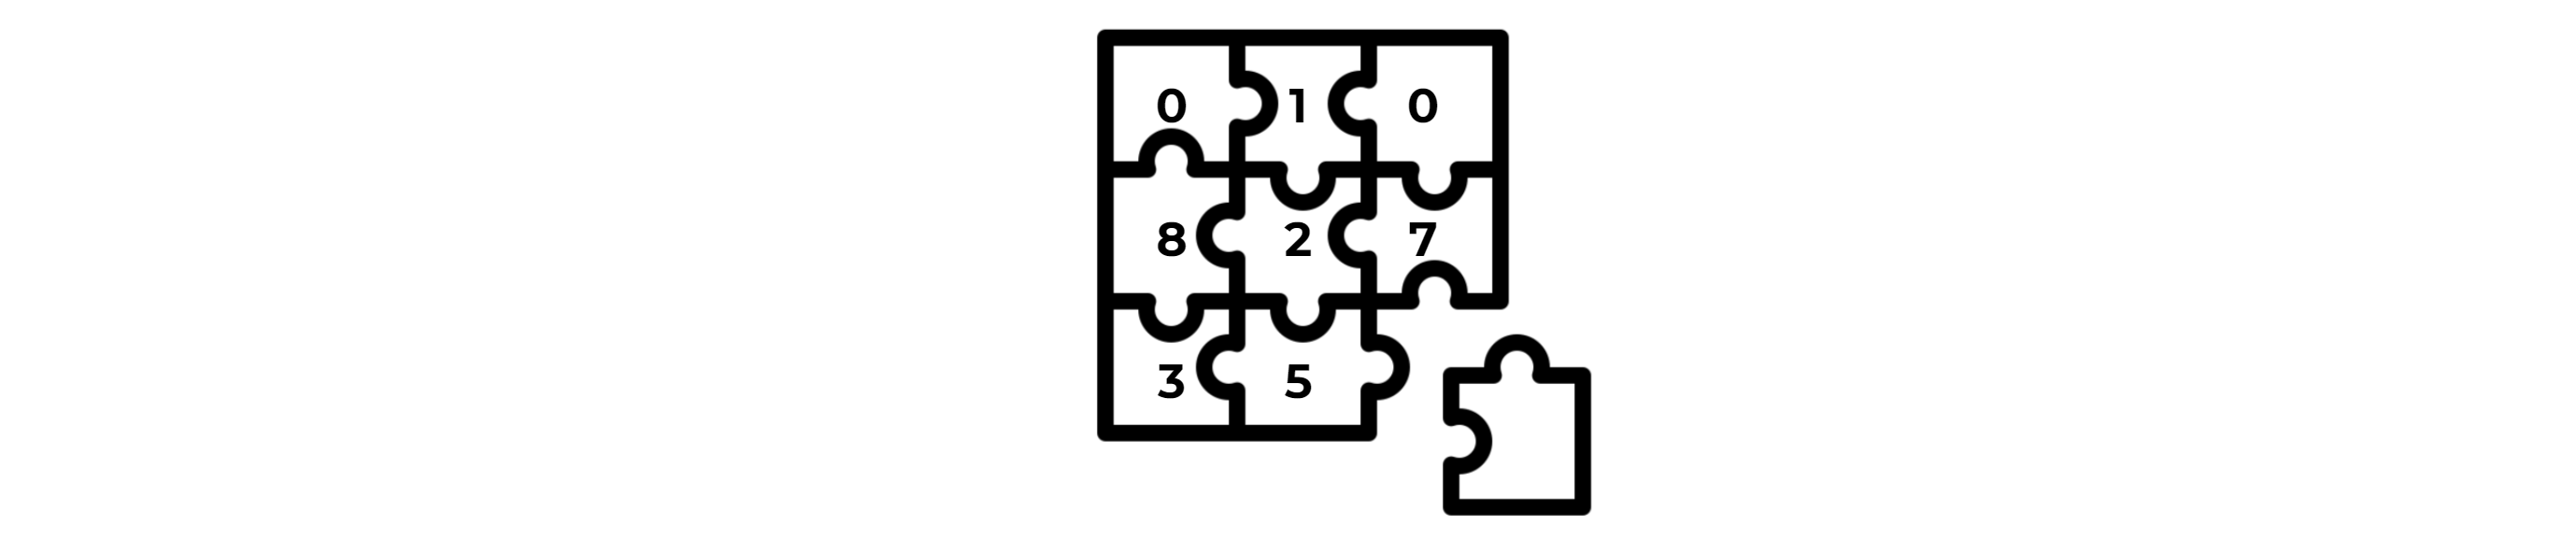

The central message for this notebook is that you have at your disposal **multiple manners** to fill the missing data in your datasets.
* We will study in the upcoming lessons a library called `feature-engine`, which has a wide set of functions to handle missing data
  * It is a matter of **experience and busines acumen** to understand the most suitable approach to apply to your variable that has missing data

---

Before defining missing data, let's use a NumPy function called [np.random.choice()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html), for this particular unit, it will generate a random sample of data. The arguments are: 
  * the data itself
  * `size`, which the output's shape

Imagine if your data is a list: `[1, 2, 3]`; and you want to create an array with **7 elements** made with random elements from that list
  * Since it is a random generation, we set the seed first

np.random.seed(seed=2)
np.random.choice([1,2,3], size=7)

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> It will be very common in the workplace to get datasets with **missing data**


It occurs when **no data point** is stored for the variable in a given observation
* Let's consider the DataFrame example below. We used a python dictionary to create 3 columns (A,B,C) and some elements are missing, done with NumPy: `np.nan` and `np.random.choice()`

np.random.seed(seed=1)
df = pd.DataFrame(data={'A':np.random.choice([1,2,3,np.nan], size=3),
                        'B':np.random.choice([1,np.nan], size=3),
                        'C':np.random.choice([10,20], size=3)
                        })
df

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> .isnull()

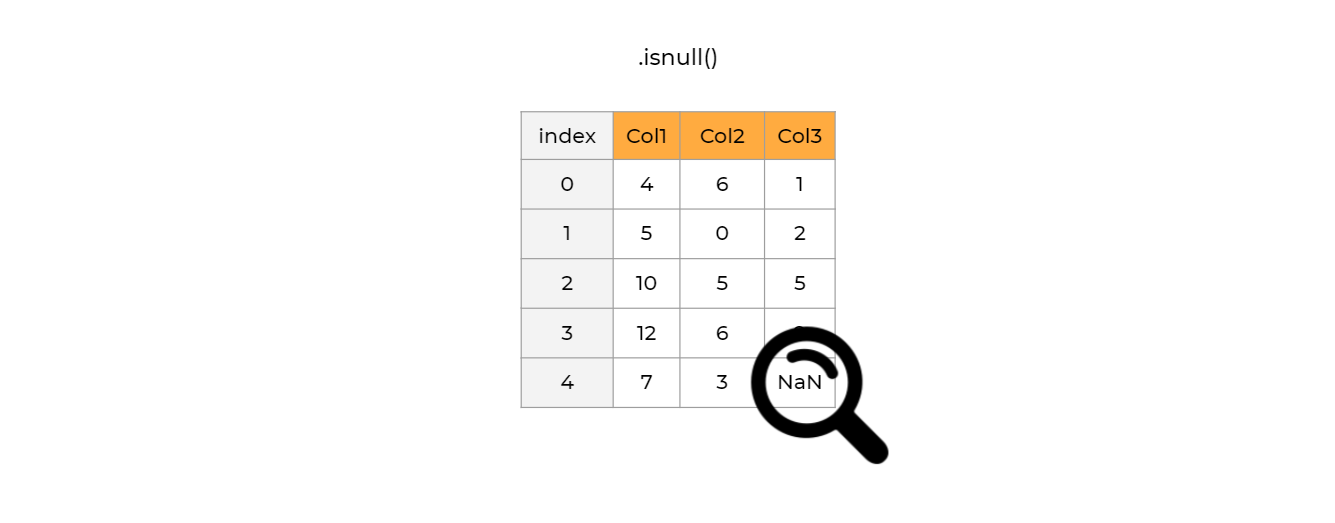

You can check missing data levels with the method `.isnull().` The result is a boolean array.
  * The function documentation is found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)

df.isnull()

Then, add the `.sum()` method to assess how many missing data rows you have per column.
  * This is the **simplest way to check missing data levels** in your tabular data
  * This function documentation is found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

df.isnull().sum()

Once you are aware of its levels, you can decide which actions to take to handle missing data


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : Consider the dataset below. It has records for 3 different species of penguins, collected from 3 islands in the Palmer Archipelago, Antarctica

df_practice = pd.read_csv("https://raw.githubusercontent.com/Code-Institute-Solutions/sample-datasets/main/penguins.csv")
df_practice

What is the missing level for this dataset?

Your output should look like 

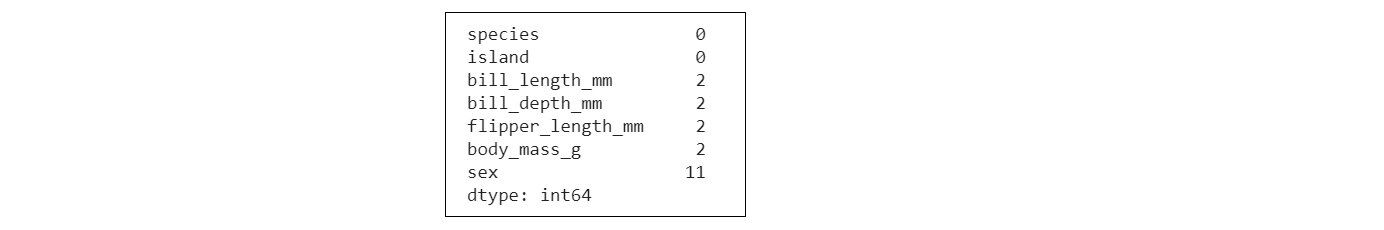

# write your code here
df_practice.isnull().sum()

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> .dropna()

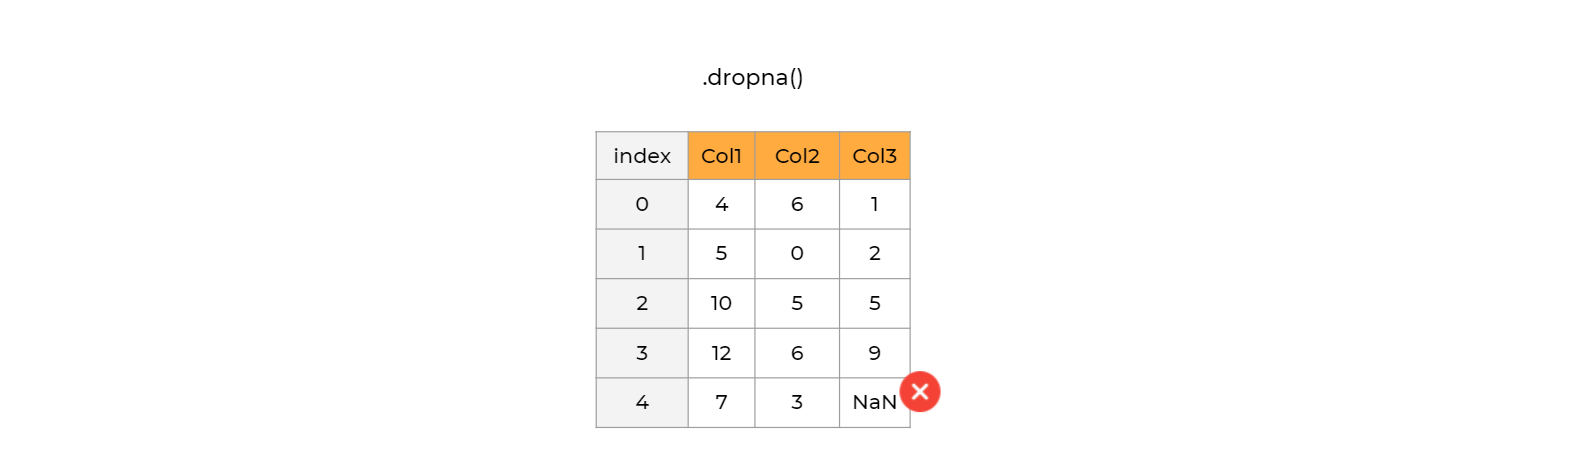

Let's recap df content

df

One possibility is to drop missing data using Pandas capabilitys. 


For that use `.dropna()`. In this case, it drops all rows that have missing data
  * When you don't set axis, the default value is `axis=0`, meaning you are dropping rows
  * **REMEMBER** that you didn't overwrite the DataFrame since `inplace` is not set to `True`
  * This function documentation is found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

df.dropna()

You can also drop all columns that have missing data

df.dropna(axis=1) 

---

You can set a threshold to drop columns or rows, with `thresh` parameter
  * The example below sets a threshold of 2 to drop a given row that has missing data
  * You will notice that the row with 1 missing piece of data was not dropped

df.dropna(thresh=2)

---

You can drop missing data for a particular set of variables
* In the workplace for example, you may be interested to drop data from a given set of variables, and for other set of variables you may be interested to apply some other method

You have to use the parameter ``subset`` and parse a list of the variables you want to drop.

df.dropna(subset=['A'])

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : for the `df_practice` dataset, drop all missing rows from `bill_length_mm`
* Note: you do not have to overwrite the DataFrame


Your output should look like

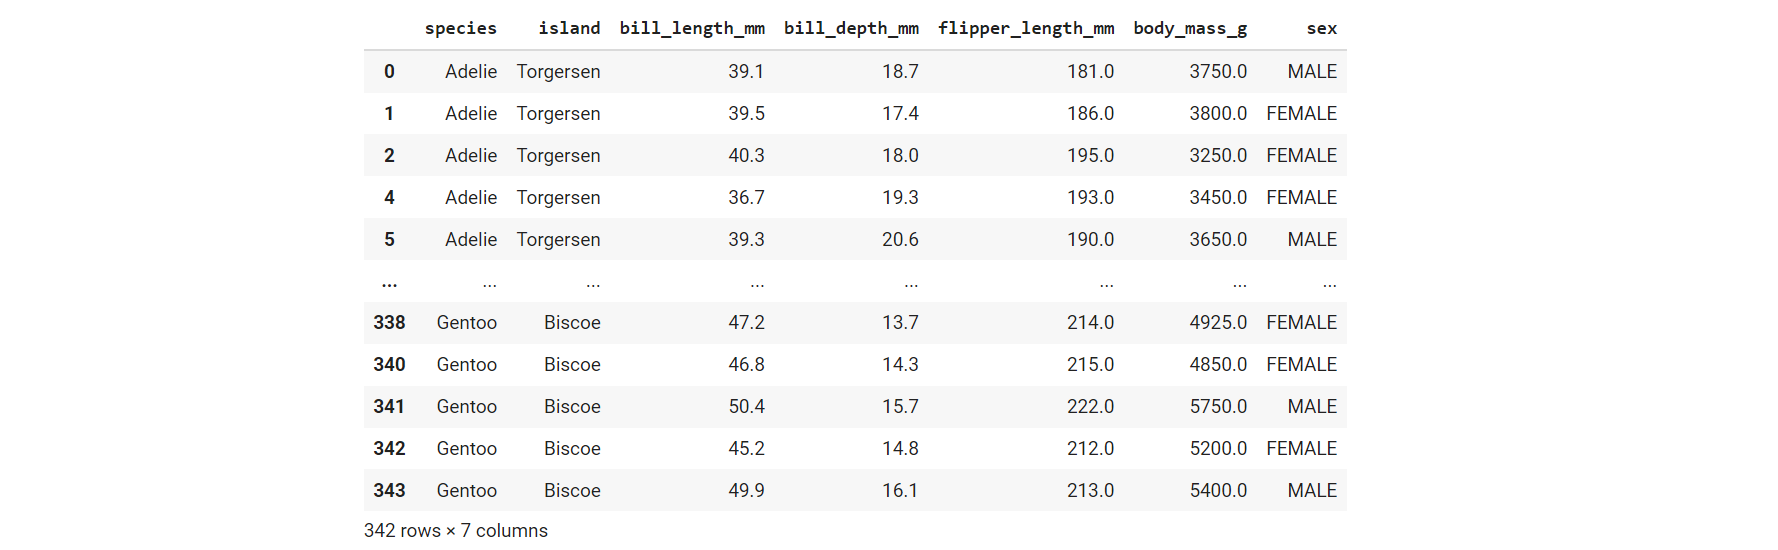

# write your code here
df_practice.dropna(subset=['bill_length_mm'])

---

df_practice

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> .fillna()

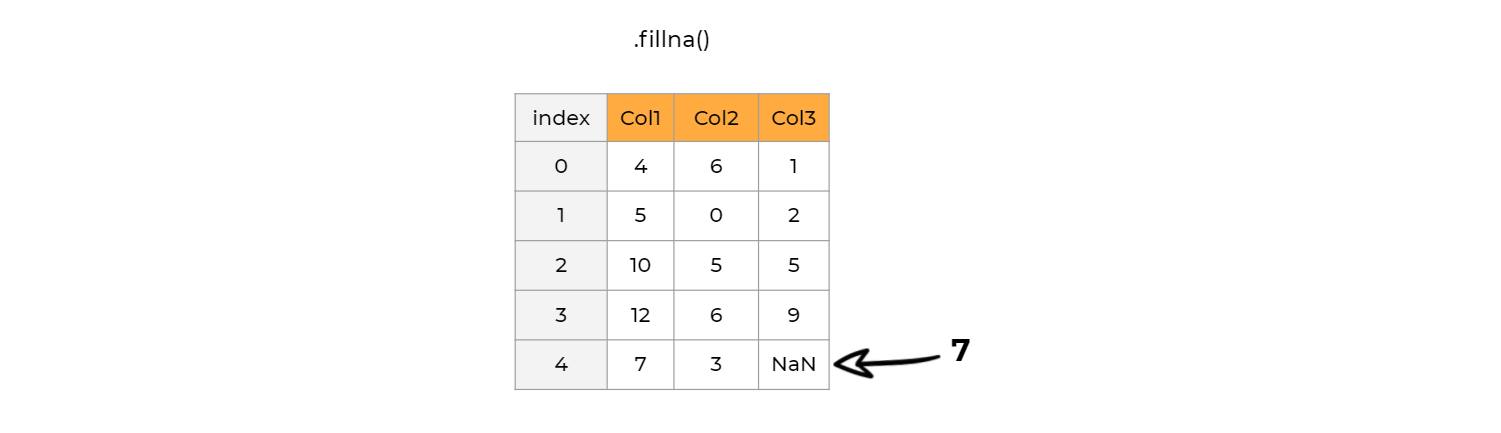

You can also fill in values using `.fillna()`. The argument is "value", which can be constant or calculated. The function documentation is found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

First a recap on how `df` looks like

df

Let's fill with a string - '`Constant_Value`' and replace all missing data in that DataFrame

df.fillna(value='Constant_Value')

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Please note that in the example above, when you fill the missing data with a string in a numerical variable, that given variable becomes categorical (object). We can check that with `.info() `after we `.fillna()`

df.fillna(value='Constant_Value').info()

---

You can fill the missing data with a numerical value. As in the example below, using -4

df.fillna(value=-4)

---

You can calculate the value to be filled in. The example below **calculates the mean for column A** and inserts this value where it is missing for that column. 
  * Note `inplace=True`

df['A'].fillna(value=df['A'].mean(),inplace=True)
df

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : consider `df_practice`

df_practice = pd.read_csv("https://raw.githubusercontent.com/Code-Institute-Solutions/sample-datasets/main/penguins.csv")
df_practice

Use mean level to fill missing data for '`flipper_length_mm`' and fill "`MALE`" for '`sex`' variable. Do your exercise in 2 lines of code, using `inplace=True` when appropriate. Your third line should be `df_practice`, so you can check a snapshot of your DataFrame and see, particularly on rows with index 3 and 339, where both variables we filled in


Your output should look like

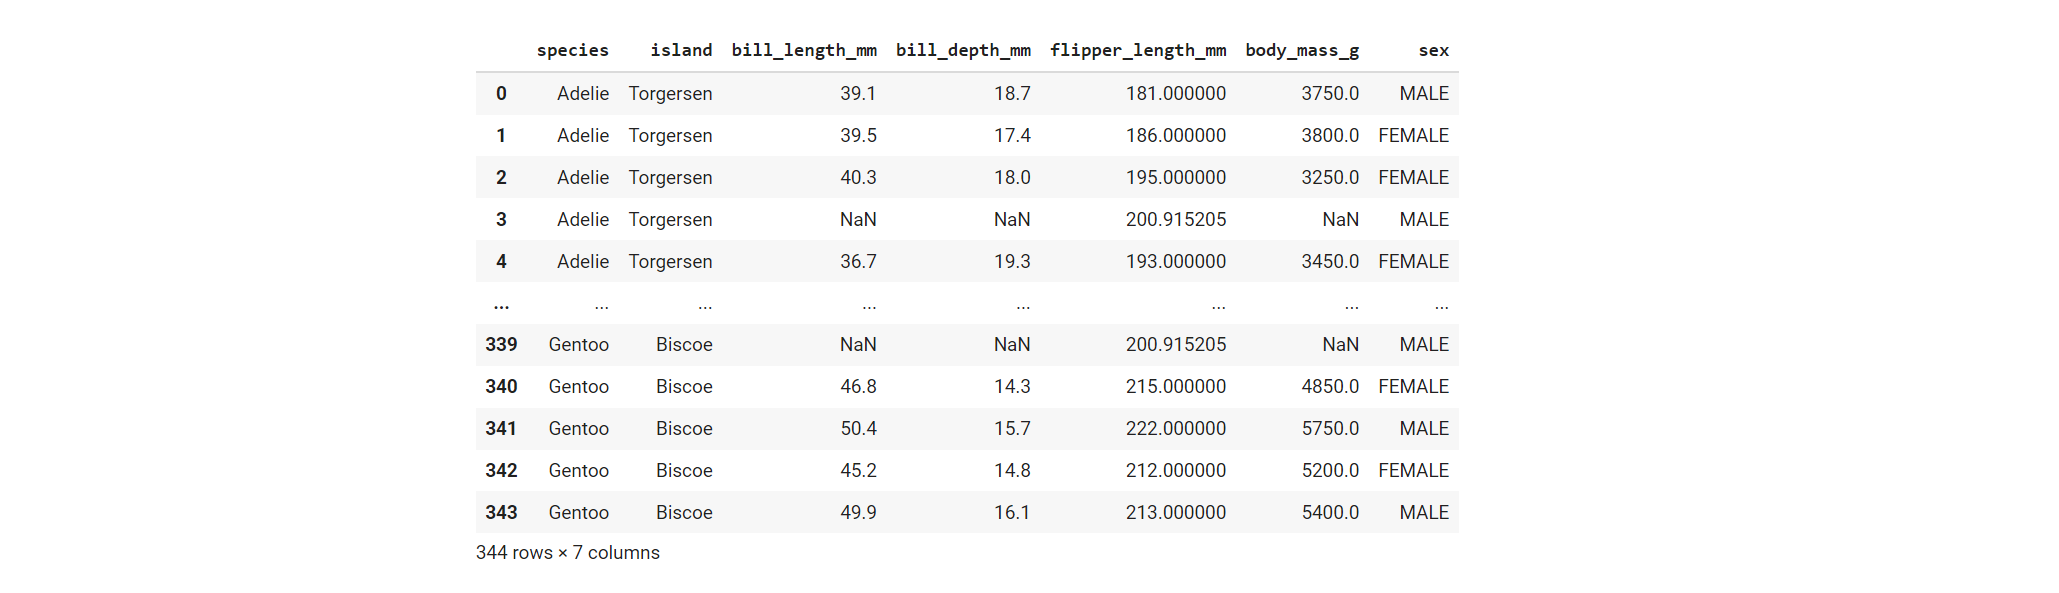

# line 1 - write your code here
df_practice['flipper_length_mm'].fillna(value=df_practice['flipper_length_mm'].mean(),inplace=True)
# line 2 - write your code here
df_practice['sex'].fillna(value="MALE", inplace=True)
df_practice

---

Consider the following DataFrame created in a similar manner to the previous, using NumPy functions

np.random.seed(seed=4)
df = pd.DataFrame(data={'Col1':np.random.choice([1,2,9,15,20,np.nan], size=10),
                        'Col2':np.random.choice([100,300,400,500,np.nan], size=10)
                        })
df

* You can consider another argument: `method`. At `.fillna()` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html), there are few methods to consider.
* You can select '`ffill`', where you will **propagate the last valid observation forward to next valid**

df.fillna(method='ffill')

---

* Or, you can consider '`bfill`', where you **use the next valid observation to fill gap**
  * You will notice that the last row of Col1 still has a missing value, since it can't find a next row to use the method

df.fillna(method='bfill')

---